In [3]:
# imports

import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr

In [4]:
# initialization

load_dotenv()
os.environ['OPEN_AI_KEY'] = os.getenv('OPEN_AI_KEY', 'your-key-if-not -using-env')
MODEL = 'gpt-4o-mini'
openai = OpenAI()

In [5]:
system_message = "You are a helpful assistant for an airline called FligtAI"
system_message += "Give short, courteous answers, no more than 1 line"
system_message += "Always be accurate, if you don't know the answer, just say so"

# Multi-modal

In [6]:
# some imports for handling Images

import base64
from io import BytesIO
from PIL import Image

In [7]:
def artist(city):
    image_response = openai.images.generate(
        model="dall-e-3",
        prompt=f"An image representing a vacation in {city} showing tourists spots and everything unique about {city}, in a vibrant modern style.",
        size="1024x1024",
        n=1,
        response_format="b64_json"
    )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

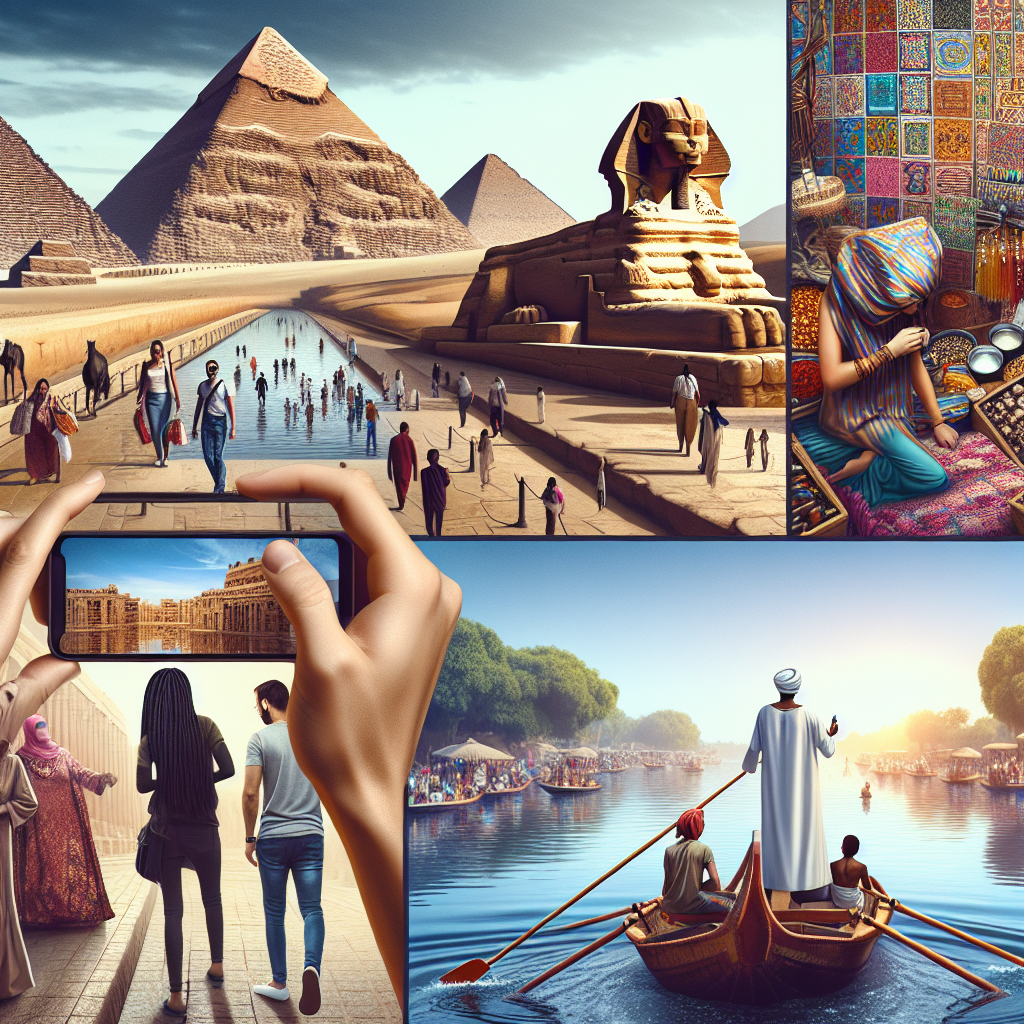

In [20]:
image = artist("Egypt")
display(image)

# Audio

function Talker that uses OpenAI's speech model to generate Audio

In [8]:
from pydub import AudioSegment
from pydub.playback import play

def talker(message):
    response = openai.audio.speech.create(
        model="tts-1",
        voice="onyx",
        input=message
    )

    audio_stream = BytesIO(response.content)
    audio = AudioSegment.from_file(audio_stream, format="mp3")
    play(audio)

In [9]:
talker("Hello.  Welcome to the world of artificial intelligence.  Don't worry I won't turn into a Terminator")

In [10]:
talker("Hola.  Necesito comprobar si puedo hablar en Espanol.  Hay caramba! Si puedo hablar Espanol!")

function Listener that uses OpenAI's speech model to listen and respond

In [24]:
import numpy as np
import sounddevice as sd
import scipy.io.wavfile as wav

# Function to record audio
def record_audio(duration=5, fs=16000):
    print("Recording...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait() # wait until the recording is finished
    print("Recording complete")
    return np.squeeze(audio)


# Convert recorded audio to wav format
def save_audio(audio_data, filename="input.wav", fs=16000):
    wav.write(filename, fs, audio_data)

# OpenAI Whisper API call to transcribe speech
def transcribe_audio(filename):
    with open(filename, "rb") as audio_file:
        transcription = openai.audio.transcriptions.create(
            model="whisper-1",
            file=audio_file
        )
    return transcription.text

def messages_for(prompt):
    return [
        {"role": "system", "content": "You are a helpful assistant"},
        {"role": "user", "content": prompt}
    ]

# Generate a response using GPT
def get_gpt_response(prompt):
    response = openai.chat.completions.create(
        model=MODEL,
        messages=messages_for(prompt)
    )
    
    # return response.choices[0].text.strip()
    print(response.choices[0])
    return response.choices[0].message.content

# Function to convert response to audio and play it.
def speak_message(message):
    response = openai.audio.speech.create(
        model="tts-1",
        voice="onyx",
        input=message
    )

    audio_stream = BytesIO(response.content)
    audio = AudioSegment.from_file(audio_stream, format="mp3")
    play(audio)

# Main function to capture audio, transcribe, response and play
def talker():
    # Step 1: Record audio from user
    audio_data = record_audio(duration=5)
    save_audio(audio_data)

    # Step 2: Transcribe audio using OpenAI Whisper 
    user_message = transcribe_audio("input.wav")
    print("You said: ", user_message)

    # Step 3: Generate response using GPT
    response_message = get_gpt_response(user_message)
    print("AI Response: ", response_message)

    # Step 4: Convert response to audio and play it
    speak_message(response_message)

# Call the Talker function to begin interaction
talker()


Recording...
Recording complete
You said:  Hello, this is Kevin and I'm just testing AI.
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Hello Kevin! I'm here to help. If you have any questions or need assistance with something, feel free to ask!", refusal=None, role='assistant', function_call=None, tool_calls=None))
AI Response:  Hello Kevin! I'm here to help. If you have any questions or need assistance with something, feel free to ask!


In [25]:
talker()

Recording...
Recording complete
You said:  Can you tell me what is the future of Bitcoin?
Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="As of my last update, the future of Bitcoin is subject to a wide range of opinions and predictions, influenced by various factors. Here are some key aspects to consider:\n\n1. **Adoption and Use Cases**: Bitcoin's future will depend on how widely it is adopted for various use cases, including as a store of value, medium of exchange, and in other financial applications. Increased adoption by businesses and individuals could bolster its value and stability.\n\n2. **Regulation**: Government regulations can significantly impact Bitcoin's future. Clear regulations could promote institutional investment and legitimacy, while restrictive regulations could hinder its growth and acceptance.\n\n3. **Technological Developments**: Upgrades to the Bitcoin protocol, improvements in scalability, and the development of Lay